In [3]:
from Scripts import loading as dl, profiling as pf, preprocessing as prep
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression, mutual_info_classif, f_classif
from sklearn.linear_model import LogisticRegression

from sklearn.svm import LinearSVC
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [2]:
amazon_link = '../Data/amazon_movie.pkl'
df = dl.load_sampled(amazon_link, 10000)

In [4]:
df[df['text'] == '']

,text,label


In [5]:
df[df.label.isnull()]

,text,label


In [6]:
pf.create_word_count(df)

,text,label,word_count
0,I did not learn after the first movie. I boug...,1.0,102
1,I won't review the movie because this has alre...,1.0,308
2,never explained anything and the ending was th...,1.0,30
3,pathetic acting and unrealistic jujitsu fight ...,1.0,28
4,Incredible (as in unbelievable) that three suc...,1.0,83
...,...,...,...
49995,After Jaws and Close Encounters of the Third K...,5.0,315
49996,"Although this movie didn't hit top charts, if ...",5.0,64
49997,Every once in a while a movie comes along that...,5.0,194
49998,"A superb film in the ""mayhem in the backwoods""...",5.0,56


In [7]:
pf.get_longest_review(df)

The longest review text in our sample has 4306 words.
Longest review text:

49190    With the high sales of the first volume, WWE q...
Name: text, dtype: object 49190    5.0
Name: label, dtype: float64


In [8]:
pf.get_shortest_review(df)

The shortest review text in our sample has 1 words.
Review text with the shortest length of 1 word appearing 2 times.
10330    Silly.
44175    Great!
Name: text, dtype: object 10330    2.0
44175    5.0
Name: label, dtype: float64


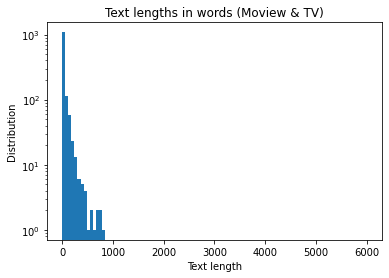

In [9]:
pf.get_word_length_dist(df, 'Moview & TV', True)

In [10]:
# PREPROCESSING
df.text = prep.preprocess_reviews(df.text)

In [11]:
df.iloc[100].text

'must say love beatl help hard day night got movi librari today terribl no plot music alright seem like everi movi made ringo seem center attent noth wrong georg coupl line movi say word weird slightli funni scene movi like john littl kid bu man sing stage stripper spaghetti scene nasti would not want buy movi cheap come beatl collect anyon realli want see moiv would get librari first stick hard day night help'

In [ ]:
# classifier = LogReg, LinearSVC,
# Feature selection: selectkbest (f_regression, mutual_info_regression, f_classif,

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.label, test_size=0.25,random_state=7, stratify=df.label)

# vectorizer = TfidfVectorizer(min_df=2 ,max_df=0.8, use_idf=True,sublinear_tf=True, ngram_range=(1,3))
vectorizer = CountVectorizer(min_df=2 ,max_df=0.8, ngram_range=(1,3))

train_vectorized = vectorizer.fit_transform(X_train)
vocab = vectorizer.get_feature_names()

print ("Feature size of TF-IDF: ", len(vocab))
test_vectorized = vectorizer.transform(X_test)

Feature size of TF-IDF:  524924


In [ ]:
# vectorizer_chi2 = SelectKBest(chi2,k=3000)
lst = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000]
for i in lst:
    vectorizer_fs = SelectKBest(score_func=f_classif(), k=i)

    print(i)

    fs_train_vectorized = vectorizer_fs.fit_transform(train_vectorized,y_train)
    fs_test_vectorized = vectorizer_fs.transform(test_vectorized)

    # Train the model using the training sets
    # clf = LogisticRegression(C=1.0, dual=False, fit_intercept=True, random_state=0, solver='lbfgs', intercept_scaling=1, max_iter=100, multi_class='multinomial')
    clf = LinearSVC(penalty='l2', loss='squared_hinge', dual=False, tol=0.0001, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight='balanced', verbose=0, random_state=123, max_iter=1000)
    clf.fit(fs_train_vectorized, y_train)
    #Predict the response for test dataset
    y_pred = clf.predict(fs_test_vectorized)
    print("Training and prediction done")
    print('Training target statistics: {}'.format(Counter(y_train), sorted(y_train)))
    print('Testing target statistics: {}'.format(Counter(y_test), sorted(y_test)))

    # Model Accuracy, how often is the classifier correct?
    print("train: 75, text: 25")
    accuracy = str(metrics.accuracy_score(y_test, y_pred))
    precision = str(metrics.precision_score(y_test, y_pred, average="macro"))
    f1 = str(metrics.f1_score(y_test, y_pred, average="macro"))
    print("Accuracy:" + accuracy)
    print("Precision:" + precision)
    print("F1:" + f1)
    print(pd.crosstab(y_test, y_pred))

    # Visualization of Confusion Matrix and saving
    plt.rcParams['figure.facecolor'] = 'white'
    title = f"Confusion matrix 75_25)"
    disp = plot_confusion_matrix(clf, fs_test_vectorized, y_test,
                                 display_labels=[1.0, 2.0, 3.0, 4.0, 5.0],
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)
    plt.show()

    title_norm = title + "_normalize"
    disp_norm = plot_confusion_matrix(clf, fs_test_vectorized, y_test,
                                 display_labels=[1.0, 2.0, 3.0, 4.0, 5.0],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
    disp_norm.ax_.set_title(title_norm)
    plt.show()


500
